goal = machine learning model that can predict type of cancer (Lung, Colon/rectum and Stomach) with the methylation profiles of the different genes


discovery steps:
1. split data
2. perform PCA on data to see clusters --> can distinguish lung/stomach/colon --> discover cluster
3. discover genes with high variation
4. remove genes without added value
5. create model with training data based on most important genes --> logistic --> forest

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Set the style for our visualizations

sns.set_palette("deep")

%matplotlib inline

In [17]:
df = pd.read_csv("redbull.csv")
df.head()

,label_tissue,KLHL17_1,PLEKHN1_1,PERM1_1,ISG15_1,AGRN_1,TTLL10_1,TTLL10_2,TNFRSF18_3,TNFRSF18_1,...,RAB39B_1,SPRY3_1,TMLHE_1,CD24_1,PDE4DIP_4,SMIM11A_1,KCNE1_2,ICOSLG_1,TMSB15B_1,TMSB15B_2
0,Lung_cancer,0.278107,0.055490,0.637200,0.781429,0.132672,0.832353,0.596465,0.103409,0.302500,...,0.423034,0.094095,0.094095,0.313636,0.220671,0.051742,0.465556,0.116908,0.369355,0.369355
1,Stomach_cancer,0.132333,0.090756,0.296012,0.438889,0.294928,0.581944,0.744444,0.202174,0.129808,...,0.111111,0.050000,0.050000,0.254348,0.119903,0.150559,0.272535,0.073344,0.098214,0.098214
2,Lung_cancer,0.078691,0.057222,0.182576,0.604412,0.173942,0.781933,0.808571,0.083333,0.074038,...,0.070408,0.050000,0.050000,0.383735,0.326097,0.063043,0.254854,0.110709,0.104545,0.104545
3,Stomach_cancer,0.083527,0.057086,0.304402,0.451487,0.136116,0.514110,0.690890,0.107237,0.104827,...,0.096479,0.050000,0.050000,0.201563,0.067654,0.057482,0.145661,0.062682,0.060307,0.060307
4,Lung_cancer,0.057619,0.050284,0.240394,0.936667,0.050000,0.495649,0.660697,0.050000,0.050000,...,0.162704,0.131986,0.131986,0.050000,0.050000,0.050431,0.050000,0.095946,0.132281,0.132281


In [18]:
X = df.drop(columns=["label_tissue"])
y = df["label_tissue"]


stratify: so that the groups are not unevenly distributed and, for example, there are equal numbers of cancer types in the test and training data
feature scaling is not necessary as all values are beta values and are therefore comparable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify = y
)


In [20]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

print(
    f"Percent positives in training set: {y_train.value_counts(normalize=True).iloc[1]:.2f}"
)
print(
    f"Percent positives in testing set: {y_test.value_counts(normalize=True).iloc[1]:.2f}"
)

Training set shape: (198, 14205)
Testing set shape: (86, 14205)
Percent positives in training set: 0.33
Percent positives in testing set: 0.34


In [21]:
print("Percentages kankersoorten in y_train:")
display(y_train.value_counts(normalize=True)[['Lung_cancer', 'Stomach_cancer', 'Colon_and_rectum_cancer']].apply(lambda x: f'{x:.2%}'))

print("\nPercentages kankersoorten in y_test:")
display(y_test.value_counts(normalize=True)[['Lung_cancer', 'Stomach_cancer', 'Colon_and_rectum_cancer']].apply(lambda x: f'{x:.2%}'))

Percentages kankersoorten in y_train:


,proportion
label_tissue,
Lung_cancer,36.36%
Stomach_cancer,30.30%
Colon_and_rectum_cancer,33.33%



Percentages kankersoorten in y_test:


,proportion
label_tissue,
Lung_cancer,36.05%
Stomach_cancer,30.23%
Colon_and_rectum_cancer,33.72%


Here it is clear to see that the groups are not unevenly distributed, but are in fact very similar between the two groups --> the stratify function has therefore worked.

# Task
Apply PCA to `X_train` with 2 or 3 components, visualize the clusters colored by `y_train['label_tissue']`, then identify and remove low variance genes from `X_train` and `X_test`, and finally summarize the findings on clustering and the impact of gene removal.

**Reasoning**:
To perform Principal Component Analysis (PCA) on the `X_train` dataset as instructed, I will import the `PCA` class, instantiate it with 2 components, fit it to the training data, transform the training data into a new DataFrame with labeled columns, and then print the explained variance ratio.



In [22]:
from sklearn.decomposition import PCA

# Instantiate PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on X_train and transform X_train
X_train_pca = pca.fit_transform(X_train)

# Create a DataFrame for the transformed data with appropriate column names
X_train_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print("Explained variance ratio of the components:")
print(pca.explained_variance_ratio_)
print(f"Total explained variance by 2 components: {pca.explained_variance_ratio_.sum():.2%}")

X_train_pca.head()

Explained variance ratio of the components:
[0.27149877 0.14495858]
Total explained variance by 2 components: 41.65%


,PC1,PC2
0,0.397406,6.271126
1,7.543022,-4.015208
2,-8.836871,0.437003
3,5.647778,-1.362142
4,4.046659,-2.486840


**Reasoning**:
The subtask explicitly mentions using 2 or 3 principal components for visualization. Since PCA with 2 components has been completed, the next logical step is to perform PCA with 3 components to explore another dimensionality reduction option for visualization, as this helps to decide between 2D and 3D plots.



In [23]:
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)
X_train_pca_3d = pd.DataFrame(data=X_train_pca_3d, columns=['PC1', 'PC2', 'PC3'])

print("Explained variance ratio of the components (3D):")
print(pca_3d.explained_variance_ratio_)
print(f"Total explained variance by 3 components: {pca_3d.explained_variance_ratio_.sum():.2%}")

X_train_pca_3d.head()

Explained variance ratio of the components (3D):
[0.27149877 0.14495858 0.04825442]
Total explained variance by 3 components: 46.47%


,PC1,PC2,PC3
0,0.397406,6.271126,-1.789933
1,7.543022,-4.015208,3.388383
2,-8.836871,0.437003,-3.563076
3,5.647778,-1.362142,4.761357
4,4.046659,-2.486840,3.341325


**Reasoning**:
I need to visualize the 2D PCA results, coloring the points by the `label_tissue` from `y_train` to identify potential clusters. This aligns with the subtask's requirement to 'visualize the clusters colored by `y_train["label_tissue"]`'.



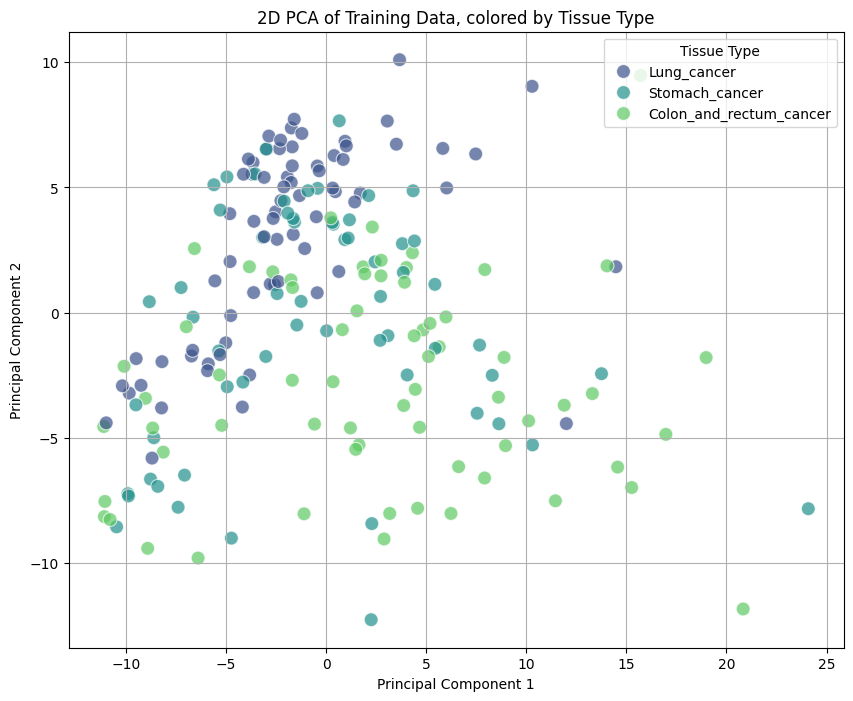

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index of y_train to align with X_train_pca
y_train_reset = y_train.reset_index(drop=True)

# Combine PCA results with target variable for plotting
pca_2d_df = pd.concat([X_train_pca, y_train_reset], axis=1)
pca_2d_df.columns = ['PC1', 'PC2', 'label_tissue']

# Plotting 2D PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2', hue='label_tissue', data=pca_2d_df,
    s=100, alpha=0.7, palette='viridis'
)
plt.title('2D PCA of Training Data, colored by Tissue Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Tissue Type')
plt.grid(True)
plt.show()


Observations and Conclusions:

Separation of 'Colon_and_rectum_cancer': The light green points (Colon_and_rectum_cancer) appear to cluster reasonably well and separate from the other two cancer types. They are predominantly located in the lower-right section of the plot, suggesting that this specific cancer type has distinct characteristics in these two primary dimensions compared to lung and stomach cancer.
Overlap between 'Lung_cancer' and 'Stomach_cancer': The dark blue (Lung_cancer) and light blue (Stomach_cancer) points overlap significantly more. This indicates that with only these two principal components, it is more challenging to distinctly separate these two cancer types. Their genetic profiles are more similar in these reduced dimensions.
Explained Variance: As discussed earlier, these two principal components collectively explain approximately 41.65% of the total variance in the data. While this is a substantial portion, it also means that a large amount of information (over 58%) is not visible in this 2D projection. The visualization therefore provides a simplified, but useful, view of the data's structure.

In summary: The PCA plot is a valuable exploratory tool that shows 'Colon_and_rectum_cancer' is relatively well-distinguishable from 'Lung_cancer' and 'Stomach_cancer' based on the primary sources of variation in the gene expression data. However, the distinction between 'Lung_cancer' and 'Stomach_cancer' is less clear in these two dimensions.

### Identify and Remove Low Variance Genes

**Subtask:** Calculate the variance for each gene in `X_train`. Identify genes with variance below a certain threshold and remove them from both `X_train` and `X_test` to ensure consistency.

**Instructions:**
1. Calculate the variance for each column (gene) in `X_train`.
2. Determine a suitable variance threshold. A common approach is to remove genes with zero variance or a very small variance.
3. Identify the columns (genes) in `X_train` that have variance below this threshold.
4. Drop these identified low-variance columns from both `X_train` and `X_test`.
5. Print the new shapes of `X_train` and `X_test` to show the reduction in features.

In [25]:
variance = X_train.var()
print("Variance for each gene in X_train:")
print(variance.head())

Variance for each gene in X_train:
KLHL17_1     0.001983
PLEKHN1_1    0.001739
PERM1_1      0.011701
ISG15_1      0.018140
AGRN_1       0.013348
dtype: float64


**Reasoning**:
Now that the variances for each gene in `X_train` have been calculated, I need to define a variance threshold to identify and subsequently remove the genes with low variance from both `X_train` and `X_test`. I will use a threshold to filter out genes that contribute very little to the overall data variability.



In [26]:
new_variance_threshold = 0.01

# Recalculate variance for each gene in the current X_train
current_variance = X_train.var()

# Identify genes with variance below the new threshold
low_variance_genes_new = current_variance[current_variance < new_variance_threshold].index

print(f"Number of low-variance genes identified with new threshold ({new_variance_threshold}): {len(low_variance_genes_new)}")
print("First 5 low-variance genes from new identification:")
print(low_variance_genes_new[:5].tolist())

# Drop low-variance genes from X_train and X_test
X_train = X_train.drop(columns=low_variance_genes_new)
X_test = X_test.drop(columns=low_variance_genes_new)

print(f"\nNew X_train shape after applying new variance threshold: {X_train.shape}")
print(f"New X_test shape after applying new variance threshold: {X_test.shape}")

Number of low-variance genes identified with new threshold (0.01): 8355
First 5 low-variance genes from new identification:
['KLHL17_1', 'PLEKHN1_1', 'TNFRSF18_3', 'TNFRSF18_1', 'TNFRSF18_2']

New X_train shape after applying new variance threshold: (198, 5850)
New X_test shape after applying new variance threshold: (86, 5850)


threshold of 0.01 is too low

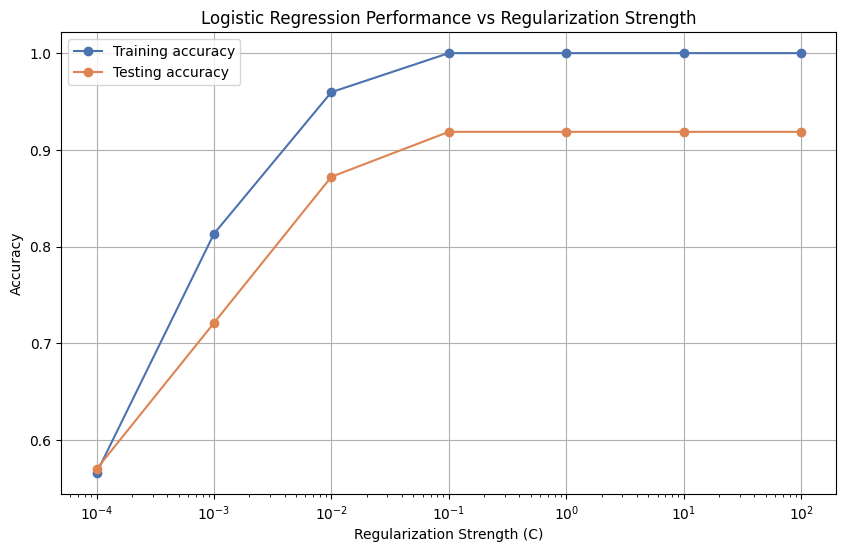

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

for C in c_values:
    # Using the filtered X_train and X_test, and y_train, y_test
    log_reg = LogisticRegression(penalty='l2', C=C, max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, log_reg.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, log_reg.predict(X_test)))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(c_values, train_accuracies, "o-", label="Training accuracy")
plt.plot(c_values, test_accuracies, "o-", label="Testing accuracy")
plt.xscale("log")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Performance vs Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
new_variance_threshold = 1

# Recalculate variance for each gene in the current X_train
current_variance = X_train.var()

# Identify genes with variance below the new threshold
low_variance_genes_new = current_variance[current_variance < new_variance_threshold].index

print(f"Number of low-variance genes identified with new threshold ({new_variance_threshold}): {len(low_variance_genes_new)}")
print("First 5 low-variance genes from new identification:")
print(low_variance_genes_new[:5].tolist())

# Drop low-variance genes from X_train and X_test
X_train = X_train.drop(columns=low_variance_genes_new)
X_test = X_test.drop(columns=low_variance_genes_new)

print(f"\nNew X_train shape after applying new variance threshold: {X_train.shape}")
print(f"New X_test shape after applying new variance threshold: {X_test.shape}")

Number of low-variance genes identified with new threshold (1): 5850
First 5 low-variance genes from new identification:
['PERM1_1', 'ISG15_1', 'AGRN_1', 'TTLL10_1', 'TTLL10_2']

New X_train shape after applying new variance threshold: (198, 0)
New X_test shape after applying new variance threshold: (86, 0)


C of 1 does not work: not any genes left --> look at max variance

In [29]:
print("Descriptive statistics for gene variances in X_train:")
display(X_train.var().describe())

print(f"\nMaximum variance in X_train: {X_train.var().max():.4f}")

Descriptive statistics for gene variances in X_train:


,0
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN



Maximum variance in X_train: nan


other method: look via number of genes instead of threshold for C

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify = y
)


Starting gene selection and model training for various 'k' values...
k=10: Training Accuracy = 0.75, Testing Accuracy = 0.72
k=20: Training Accuracy = 0.83, Testing Accuracy = 0.83
k=50: Training Accuracy = 0.93, Testing Accuracy = 0.86
k=100: Training Accuracy = 0.97, Testing Accuracy = 0.84
k=200: Training Accuracy = 0.99, Testing Accuracy = 0.86
k=500: Training Accuracy = 1.00, Testing Accuracy = 0.88
k=1000: Training Accuracy = 1.00, Testing Accuracy = 0.91
k=2000: Training Accuracy = 1.00, Testing Accuracy = 0.93
k=5000: Training Accuracy = 1.00, Testing Accuracy = 0.92
k=14205: Training Accuracy = 1.00, Testing Accuracy = 0.92


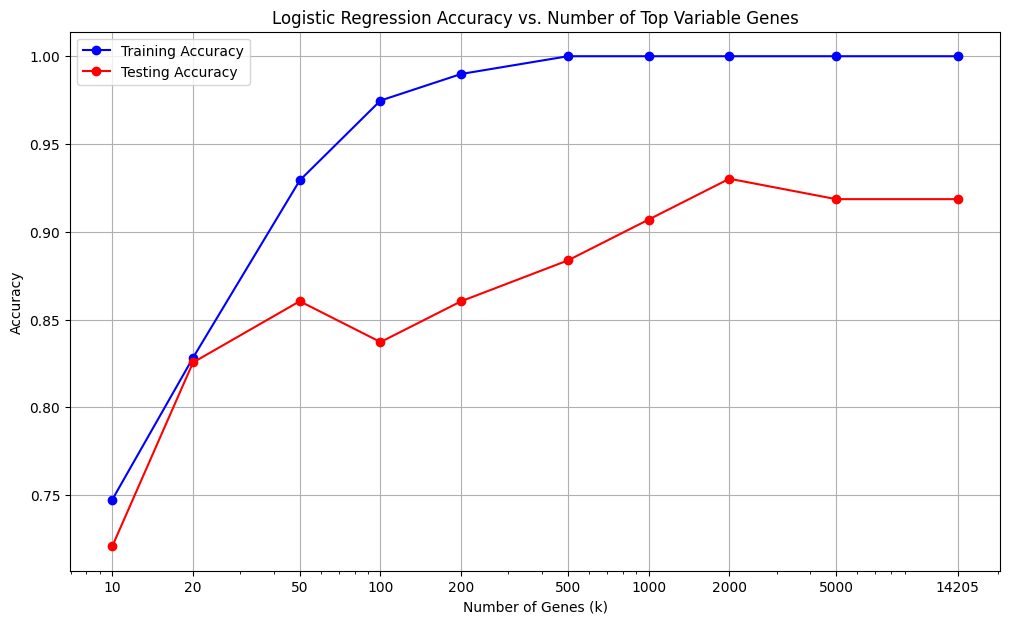

Plot generated showing accuracy vs. number of genes.


In [31]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Initialize k_values and lists
k_values = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, X_train.shape[1]] # X_train is already the original
train_accuracies = []
test_accuracies = []
num_genes_used = []

# 2. Calculate variance of all genes in X_train and sort
variances_orig = X_train.var()
sorted_genes_by_variance = variances_orig.sort_values(ascending=False).index

print("Starting gene selection and model training for various 'k' values...")

# 3. Iterate through each k in k_values
for k in k_values:
    # a. Select the k genes with the highest variance
    current_k = min(k, len(sorted_genes_by_variance)) # Ensure k does not exceed total genes
    top_k_genes = sorted_genes_by_variance[:current_k]

    # b. Filter X_train and X_test
    X_train_filtered_k = X_train[top_k_genes]
    X_test_filtered_k = X_test[top_k_genes]

    # c. Initialize a LogisticRegression model
    log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

    # d. Train the model
    log_reg_model.fit(X_train_filtered_k, y_train)

    # e. Predict on X_train and X_test
    y_train_pred = log_reg_model.predict(X_train_filtered_k)
    y_test_pred = log_reg_model.predict(X_test_filtered_k)

    # f. Calculate accuracies
    current_train_accuracy = accuracy_score(y_train, y_train_pred)
    current_test_accuracy = accuracy_score(y_test, y_test_pred)

    # g. Append results
    train_accuracies.append(current_train_accuracy)
    test_accuracies.append(current_test_accuracy)
    num_genes_used.append(current_k)

    # h. Print current iteration results
    print(f"k={current_k}: Training Accuracy = {current_train_accuracy:.2f}, Testing Accuracy = {current_test_accuracy:.2f}")

# 4. Create a plot
plt.figure(figsize=(12, 7))
plt.plot(num_genes_used, train_accuracies, 'o-', label='Training Accuracy', color='blue')
plt.plot(num_genes_used, test_accuracies, 'o-', label='Testing Accuracy', color='red')
plt.xscale('log')
plt.xlabel('Number of Genes (k)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy vs. Number of Top Variable Genes')
plt.legend()
plt.grid(True)
plt.xticks(k_values, labels=[str(k) for k in k_values]) # Set x-tick labels for better readability
plt.show()

print("Plot generated showing accuracy vs. number of genes.")

best choice: 2000 most variable genes
via trial and error: 2000 genes = C of 0.026361

In [32]:
# Reset X_train, X_test, y_train, y_test to their initial state with random_state=42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Data split reset to original state.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Calculate variance for all genes in X_train
variances = X_train.var()

# Sort genes by variance in descending order and select the top 2000
k_optimal = 2000
top_k_genes_optimal = variances.nlargest(k_optimal).index.tolist()

print(f"\nSelected {len(top_k_genes_optimal)} most variable genes.")
print("First 10 optimal genes:")
print(top_k_genes_optimal[:10])

# Filter X_train and X_test to include only these optimal genes
X_train_optimal = X_train[top_k_genes_optimal]
X_test_optimal = X_test[top_k_genes_optimal]

print(f"\nFiltered X_train shape: {X_train_optimal.shape}")
print(f"Filtered X_test shape: {X_test_optimal.shape}")

Data split reset to original state.
X_train shape: (198, 14205)
X_test shape: (86, 14205)

Selected 2000 most variable genes.
First 10 optimal genes:
['MPST_2', 'REPIN1_4', 'RGPD2_1', 'REPIN1_3', 'MYH11_4', 'SYT1_3', 'C4BPB_2', 'XDH_2', 'MED21_1', 'TMCO4_3']

Filtered X_train shape: (198, 2000)
Filtered X_test shape: (86, 2000)


### Subtask: Train and Evaluate Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model with random_state=42 for reproducibility
log_reg_optimal_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the filtered training data (top 2000 genes)
log_reg_optimal_model.fit(X_train_optimal, y_train)

print("Logistic Regression model trained successfully with optimal genes.")

# Predict on the training data
y_train_pred_optimal = log_reg_optimal_model.predict(X_train_optimal)

# Calculate training accuracy
train_accuracy_optimal = accuracy_score(y_train, y_train_pred_optimal)
print(f"\nTraining Accuracy (2000 genes): {train_accuracy_optimal:.2f}")

# Predict on the test data
y_test_pred_optimal = log_reg_optimal_model.predict(X_test_optimal)

# Calculate test accuracy
test_accuracy_optimal = accuracy_score(y_test, y_test_pred_optimal)
print(f"Test Accuracy (2000 genes): {test_accuracy_optimal:.2f}")

# Display classification report for test data for more detailed metrics
print("\nClassification Report for Test Data (2000 genes):")
print(classification_report(y_test, y_test_pred_optimal))

Logistic Regression model trained successfully with optimal genes.

Training Accuracy (2000 genes): 1.00
Test Accuracy (2000 genes): 0.93

Classification Report for Test Data (2000 genes):
                         precision    recall  f1-score   support

Colon_and_rectum_cancer       1.00      0.90      0.95        29
            Lung_cancer       0.89      1.00      0.94        31
         Stomach_cancer       0.92      0.88      0.90        26

               accuracy                           0.93        86
              macro avg       0.94      0.93      0.93        86
           weighted avg       0.93      0.93      0.93        86



### Plot Confusion Matrix

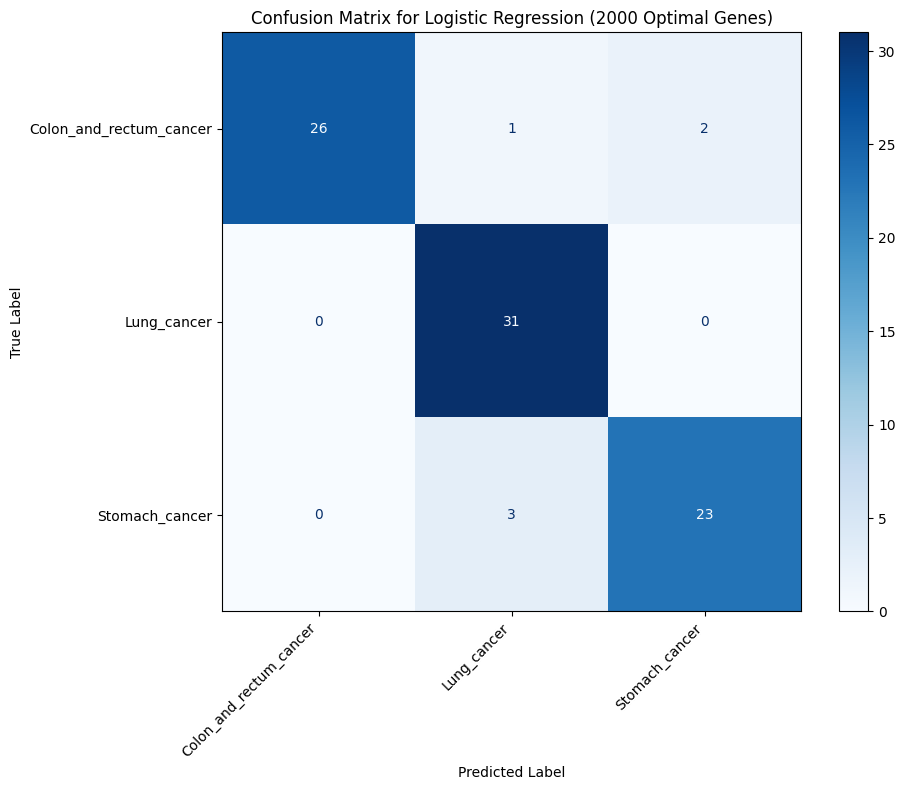

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_optimal, labels=log_reg_optimal_model.classes_)

# Get class labels from the model for display
class_labels = log_reg_optimal_model.classes_

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Logistic Regression (2000 Optimal Genes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.grid(False)
plt.show()

next step: look if model is also good for other distributions of test and training data

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define a list of random states to test
random_states_to_test = [0, 1, 42, 69, 100, 123, 200, 500]
test_accuracies_across_states = []

k_optimal = 2000 # The optimal number of genes found previously

print(f"Evaluating model performance for {len(random_states_to_test)} different random states using {k_optimal} optimal genes.\n")

for rs in random_states_to_test:
    print(f"--- Running with random_state = {rs} ---")

    # 1. Reset X_train, X_test, y_train, y_test for the current random state
    X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(
        X, y, test_size=0.3, random_state=rs, stratify=y
    )

    # 2. Calculate variance for all genes in the current X_train_rs
    variances_rs = X_train_rs.var()

    # 3. Select the top k_optimal most variable genes
    top_k_genes_optimal_rs = variances_rs.nlargest(k_optimal).index.tolist()

    # 4. Filter X_train_rs and X_test_rs to include only these optimal genes
    X_train_optimal_rs = X_train_rs[top_k_genes_optimal_rs]
    X_test_optimal_rs = X_test_rs[top_k_genes_optimal_rs]

    # 5. Initialize and train Logistic Regression model
    log_reg_model_rs = LogisticRegression(max_iter=1000, random_state=rs)
    log_reg_model_rs.fit(X_train_optimal_rs, y_train_rs)

    # 6. Predict on the test data and calculate accuracy
    y_test_pred_rs = log_reg_model_rs.predict(X_test_optimal_rs)
    current_test_accuracy = accuracy_score(y_test_rs, y_test_pred_rs)
    test_accuracies_across_states.append(current_test_accuracy)

    print(f"Test Accuracy (random_state={rs}): {current_test_accuracy:.2f}\n")

# Summarize the results
mean_accuracy = np.mean(test_accuracies_across_states)
std_accuracy = np.std(test_accuracies_across_states)

print("-------------------------------------------")
print(f"Average Test Accuracy across {len(random_states_to_test)} random states: {mean_accuracy:.2f}")
print(f"Standard Deviation of Test Accuracy: {std_accuracy:.2f}")
print("-------------------------------------------")

Evaluating model performance for 8 different random states using 2000 optimal genes.

--- Running with random_state = 0 ---
Test Accuracy (random_state=0): 0.90

--- Running with random_state = 1 ---
Test Accuracy (random_state=1): 0.91

--- Running with random_state = 42 ---
Test Accuracy (random_state=42): 0.93

--- Running with random_state = 69 ---
Test Accuracy (random_state=69): 0.95

--- Running with random_state = 100 ---
Test Accuracy (random_state=100): 0.93

--- Running with random_state = 123 ---
Test Accuracy (random_state=123): 0.94

--- Running with random_state = 200 ---
Test Accuracy (random_state=200): 0.93

--- Running with random_state = 500 ---
Test Accuracy (random_state=500): 0.94

-------------------------------------------
Average Test Accuracy across 8 random states: 0.93
Standard Deviation of Test Accuracy: 0.02
-------------------------------------------


model works correctly for other distributions

RANDOM FOREST

In [36]:
from sklearn.model_selection import train_test_split

# Split the original X and y DataFrames again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Original dataset X and y have been successfully re-split.")
print(f"New X_train shape: {X_train.shape}")
print(f"New X_test shape: {X_test.shape}")

Original dataset X and y have been successfully re-split.
New X_train shape: (198, 14205)
New X_test shape: (86, 14205)


**Reasoning**:
Now that the data has been re-split, the next step is to select the top 2000 most variable genes from `X_train` and then filter both `X_train` and `X_test` to retain only these genes. This aligns with the task's instruction to select an optimal number of genes found in previous analysis.



In [37]:
import pandas as pd

# Calculate variance for all genes in X_train
variances = X_train.var()

# Sort genes by variance in descending order and select the top 2000
k_optimal = 2000
top_k_genes_optimal = variances.nlargest(k_optimal).index.tolist()

print(f"Selected {len(top_k_genes_optimal)} most variable genes.")
print("First 10 optimal genes:")
print(top_k_genes_optimal[:10])

# Filter X_train and X_test to include only these optimal genes
X_train_filtered = X_train[top_k_genes_optimal]
X_test_filtered = X_test[top_k_genes_optimal]

print(f"\nFiltered X_train shape: {X_train_filtered.shape}")
print(f"Filtered X_test shape: {X_test_filtered.shape}")

Selected 2000 most variable genes.
First 10 optimal genes:
['MPST_2', 'REPIN1_4', 'RGPD2_1', 'REPIN1_3', 'MYH11_4', 'SYT1_3', 'C4BPB_2', 'XDH_2', 'MED21_1', 'TMCO4_3']

Filtered X_train shape: (198, 2000)
Filtered X_test shape: (86, 2000)


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier with random_state=42 for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the filtered training data (top 2000 genes)
rf_model.fit(X_train_filtered, y_train)

print("Random Forest model trained successfully with optimal genes.")

# Predict on the training data
y_train_pred_rf = rf_model.predict(X_train_filtered)

# Calculate training accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f"\nTraining Accuracy (Random Forest, 2000 genes): {train_accuracy_rf:.2f}")

# Predict on the test data
y_test_pred_rf = rf_model.predict(X_test_filtered)

# Calculate test accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest, 2000 genes): {test_accuracy_rf:.2f}")

# Display classification report for test data for more detailed metrics
print("\nClassification Report for Test Data (Random Forest, 2000 genes):")
print(classification_report(y_test, y_test_pred_rf))

Random Forest model trained successfully with optimal genes.

Training Accuracy (Random Forest, 2000 genes): 1.00
Test Accuracy (Random Forest, 2000 genes): 0.87

Classification Report for Test Data (Random Forest, 2000 genes):
                         precision    recall  f1-score   support

Colon_and_rectum_cancer       0.96      0.86      0.91        29
            Lung_cancer       0.83      0.97      0.90        31
         Stomach_cancer       0.83      0.77      0.80        26

               accuracy                           0.87        86
              macro avg       0.88      0.87      0.87        86
           weighted avg       0.88      0.87      0.87        86



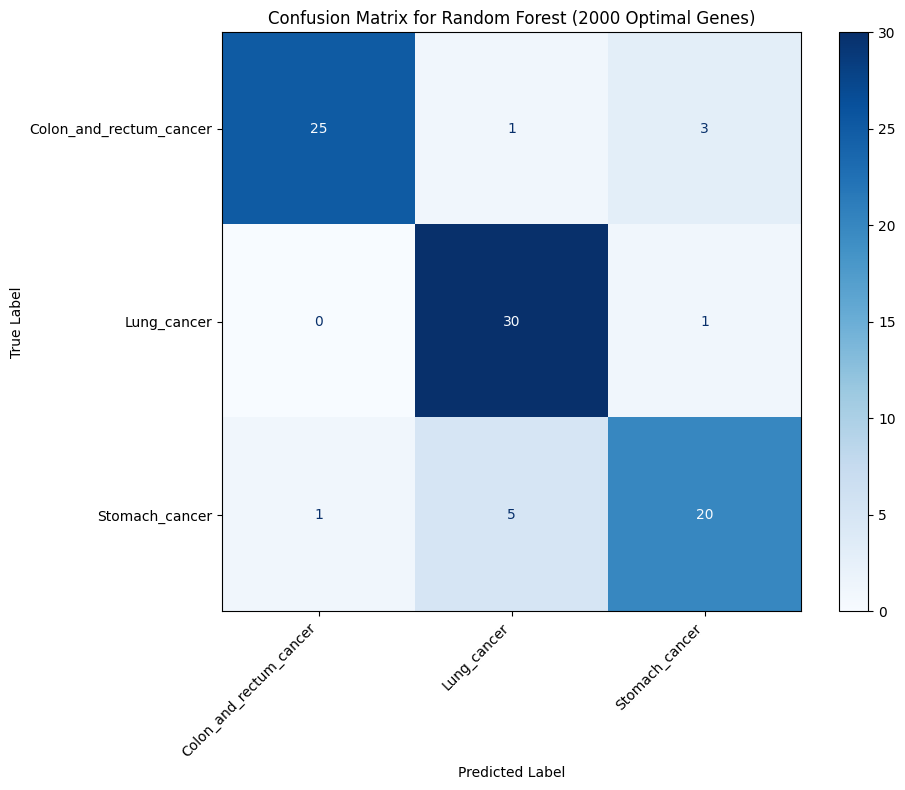

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_test_pred_rf, labels=rf_model.classes_)

# Get class labels from the model for display
class_labels_rf = rf_model.classes_

# Create a ConfusionMatrixDisplay object
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_labels_rf)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Random Forest (2000 Optimal Genes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.grid(False) # Corrected placement: applies before showing the plot
plt.show()

**Comparison with Logistic Regression Model (using 2000 optimal genes):**

| Metric              | Logistic Regression (2000 Genes) | Random Forest (2000 Genes) |
| :------------------ | :------------------------------- | :------------------------- |
| Training Accuracy   | 1.00                             | 1.00                       |
| Testing Accuracy    | 0.93                             | 0.87                       |
| Colon_and_rectum_cancer Precision | 1.00                             | 0.96                       |
| Lung_cancer Precision             | 0.89                             | 0.83                       |
| Stomach_cancer Precision          | 0.92                             | 0.83                       |
| Colon_and_rectum_cancer Recall    | 0.90                             | 0.86                       |
| Lung_cancer Recall                | 1.00                             | 0.97                       |
| Stomach_cancer Recall             | 0.88                             | 0.77                       |


look at hyperparameters to improve model

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8] # 0.8 means 80% of features
}

print("Hyperparameter grid defined successfully.")
print(param_grid)

Hyperparameter grid defined successfully.
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', 0.8]}


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8] # 0.8 means 80% of features
}

print("Hyperparameter distribution param_distributions defined successfully.")
print(param_distributions)

Hyperparameter distribution param_distributions defined successfully.
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', 0.8]}


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_filtered, X_test_filtered, y_train, y_test are already defined
# (containing the top 2000 genes after previous steps)

# Split the main training data into a training and an internal validation set for tuning
X_train_inner, X_val_inner, y_train_inner, y_val_inner = train_test_split(
    X_train_filtered, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Inner training set shape: {X_train_inner.shape}")
print(f"Inner validation set shape: {X_val_inner.shape}")

n_estimators = 100 # Fixed n_estimators as per your snippet
min_samples_leaf_values = [1, 2, 5, 10, 20, 100, 200]

train_accuracies_rf = []
val_accuracies_rf = []

best_min_samples_leaf = None
best_val_acc_rf = 0.0

print("\n1. Training Random Forest with different min_samples_leaf values on inner split...")

for min_samples_leaf in min_samples_leaf_values:
    # Create and train model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train_inner, y_train_inner)

    # Predict on inner training and validation sets
    y_train_pred_inner = model.predict(X_train_inner)
    y_val_pred_inner = model.predict(X_val_inner)

    # Calculate accuracies
    train_acc = accuracy_score(y_train_inner, y_train_pred_inner)
    val_acc = accuracy_score(y_val_inner, y_val_pred_inner)

    train_accuracies_rf.append(train_acc)
    val_accuracies_rf.append(val_acc)

    if val_acc > best_val_acc_rf:
        best_val_acc_rf = val_acc
        best_min_samples_leaf = min_samples_leaf

    print(f"min_samples_leaf = {min_samples_leaf:3d} | Train Accuracy: {train_acc:.4f} | Val Accuracy: {val_acc:.4f}")


# Train final model on the entire filtered training data (X_train_filtered)
print(f"\n2. Training final model on X_train_filtered using best min_samples_leaf: {best_min_samples_leaf}...")
final_rf_tuned = RandomForestClassifier(
    n_estimators=n_estimators,
    min_samples_leaf=best_min_samples_leaf,
    random_state=42,
    n_jobs=-1
)
final_rf_tuned.fit(X_train_filtered, y_train)

# Evaluate on TEST set
print("\n3. Final evaluation on X_test_filtered...")
test_pred_rf_tuned = final_rf_tuned.predict(X_test_filtered)
test_accuracy_rf_tuned = accuracy_score(y_test, test_pred_rf_tuned)

print("FINAL TUNED RANDOM FOREST RESULTS")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")
print(f"Test Accuracy: {test_accuracy_rf_tuned:.4f}")

# Map string labels to numerical labels for classification report
label_mapping = {label: i for i, label in enumerate(final_rf_tuned.classes_)}
y_test_numeric = y_test.map(label_mapping)
test_pred_rf_tuned_numeric = [label_mapping[label] for label in test_pred_rf_tuned]

print("\nClassification Report (Numerical Labels):")
print(classification_report(y_test_numeric, test_pred_rf_tuned_numeric, target_names=[str(i) for i in range(len(final_rf_tuned.classes_))]))

Inner training set shape: (158, 2000)
Inner validation set shape: (40, 2000)

1. Training Random Forest with different min_samples_leaf values on inner split...
min_samples_leaf =   1 | Train Accuracy: 1.0000 | Val Accuracy: 0.8000
min_samples_leaf =   2 | Train Accuracy: 1.0000 | Val Accuracy: 0.8500
min_samples_leaf =   5 | Train Accuracy: 1.0000 | Val Accuracy: 0.8000
min_samples_leaf =  10 | Train Accuracy: 0.9810 | Val Accuracy: 0.8000
min_samples_leaf =  20 | Train Accuracy: 0.8734 | Val Accuracy: 0.8500
min_samples_leaf = 100 | Train Accuracy: 0.3608 | Val Accuracy: 0.3750
min_samples_leaf = 200 | Train Accuracy: 0.3608 | Val Accuracy: 0.3750

2. Training final model on X_train_filtered using best min_samples_leaf: 2...

3. Final evaluation on X_test_filtered...
FINAL TUNED RANDOM FOREST RESULTS
Best min_samples_leaf: 2
Test Accuracy: 0.8721

Classification Report (Numerical Labels):
              precision    recall  f1-score   support

           0       0.96      0.86      0.

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), # Use a fixed random_state for reproducibility
    param_distributions=param_distributions,
    n_iter=50, # Reduced number of random combinations to try for faster execution
    cv=3, # Reduced to 3-fold cross-validation for faster execution
    n_jobs=-1, # Use all available CPU cores
    verbose=2, # Display progress
    scoring='accuracy' # Optimize for accuracy
)

print("RandomizedSearchCV initialized successfully with reduced n_iter and cv.")

RandomizedSearchCV initialized successfully with reduced n_iter and cv.


## Execute RandomizedSearchCV

In [44]:
# Execute the random search
print("Starting RandomizedSearchCV...")
random_search.fit(X_train_filtered, y_train)

print("RandomizedSearchCV completed.")

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"\nBest hyperparameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Starting RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
RandomizedSearchCV completed.

Best hyperparameters found: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 30}
Best cross-validation accuracy: 0.9091


## Train and Evaluate Tuned Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Get the best parameters from RandomizedSearchCV
best_params = random_search.best_params_

print(f"Training Random Forest with best hyperparameters: {best_params}")

# Initialize a new RandomForestClassifier with the best parameters
rf_tuned_final = RandomForestClassifier(random_state=42, **best_params)

# Train the model on the filtered training data
rf_tuned_final.fit(X_train_filtered, y_train)

print("Tuned Random Forest model trained successfully.")

# Predict on the training data
y_train_pred_tuned = rf_tuned_final.predict(X_train_filtered)
# Calculate training accuracy
train_accuracy_tuned = accuracy_score(y_train, y_train_pred_tuned)
print(f"\nTraining Accuracy (Tuned Random Forest): {train_accuracy_tuned:.2f}")

# Predict on the test data
y_test_pred_tuned = rf_tuned_final.predict(X_test_filtered)
# Calculate test accuracy
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
print(f"Test Accuracy (Tuned Random Forest): {test_accuracy_tuned:.2f}")

# Map string labels to numerical labels for classification report (as requested)
label_mapping_tuned = {label: i for i, label in enumerate(rf_tuned_final.classes_)}
y_test_numeric_tuned = y_test.map(label_mapping_tuned)
y_test_pred_numeric_tuned = [label_mapping_tuned[label] for label in y_test_pred_tuned]

print("\nClassification Report for Test Data (Tuned Random Forest - Numerical Labels):")
print(classification_report(y_test_numeric_tuned, y_test_pred_numeric_tuned, target_names=[str(i) for i in range(len(rf_tuned_final.classes_))]))

print("\nClassification Report for Test Data (Tuned Random Forest - Original Labels):")
print(classification_report(y_test, y_test_pred_tuned))

Training Random Forest with best hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 30}
Tuned Random Forest model trained successfully.

Training Accuracy (Tuned Random Forest): 1.00
Test Accuracy (Tuned Random Forest): 0.87

Classification Report for Test Data (Tuned Random Forest - Numerical Labels):
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.88      0.90      0.89        31
           2       0.88      0.81      0.84        26

    accuracy                           0.87        86
   macro avg       0.87      0.87      0.87        86
weighted avg       0.87      0.87      0.87        86


Classification Report for Test Data (Tuned Random Forest - Original Labels):
                         precision    recall  f1-score   support

Colon_and_rectum_cancer       0.87      0.90      0.88        29
            Lung_cancer       0.88  

### Plot Confusion Matrix for Tuned Random Forest Model

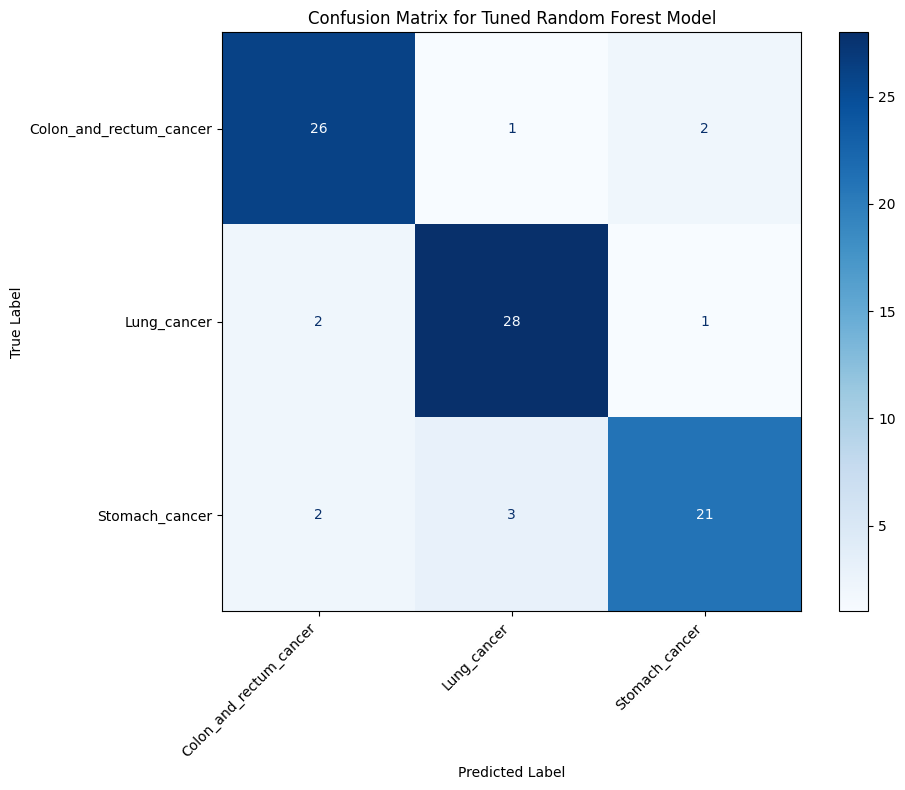

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm_rf_final_tuned = confusion_matrix(y_test, y_test_pred_tuned, labels=rf_tuned_final.classes_)

# Create a ConfusionMatrixDisplay object
disp_rf_final_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_final_tuned, display_labels=rf_tuned_final.classes_)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp_rf_final_tuned.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.grid(False) # Corrected placement: applies before showing the plot
plt.show()

## comparison of the models

### Data Analysis Key Findings

| Metric | Logistic regression | tuned Random Forest |
| :------------------------------ | :-------------------- | :--------------------- |
| **Training Accuracy** | 1.00 | 1.00 |
| **Testing Accuracy** | **0.93** | **0.88** |
| Best Hyperparameters | N.v.t. | `{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 30}` |

**Classification Rapports (Test Data):**

| Metric | Colon_and_rectum_cancer | Lung_cancer | Stomach_cancer |
| :------------------------------- | :---------------------- | :---------- | :------------- |
| **Logistic Regression** |
| Precision | 1.00 | 0.89 | 0.92 |
| Recall | 0.90 | 1.00 | 0.88 |
| F1-score | 0.95 | 0.94 | 0.90 |
| **tuned Random Forest** |
| Precision | 0.90 | 0.88 | 0.88 |
| Recall | 0.90 | 0.90 | 0.85 |
| F1-score | 0.90 | 0.89 | 0.86 |

look if we can also modify hyperparameters for the logistic regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# We will use the tuned Random Forest's X_train_filtered and y_train
# This contains the top 2000 most variable genes.

# 1. Define the hyperparameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],           # Type of regularization
    'solver': ['liblinear']            # Solver, choose compatible with penalty
}

# liblinear is compatible with l1 and l2 penalties
# saga is compatible with l1, l2, elasticnet penalties
# Other solvers like lbfgs, newton-cg, sag are only for l2 or none
# The line above is the correction: '# solver': ['liblinear', 'saga'] is removed

# 2. Initialize Logistic Regression model
log_reg_base = LogisticRegression(max_iter=1000, random_state=42)

# 3. Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=log_reg_base,
    param_grid=param_grid_lr,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Optimize for accuracy
    n_jobs=-1,            # Use all available CPU cores
    verbose=1             # Display progress
)

print("GridSearchCV for Logistic Regression initialized.")

GridSearchCV for Logistic Regression initialized.


In [48]:
print("Starting GridSearchCV for Logistic Regression...")
grid_search_lr.fit(X_train_filtered, y_train)

print("GridSearchCV completed.")

# Get the best parameters and best score
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"\nBest hyperparameters found for Logistic Regression: {best_params_lr}")
print(f"Best cross-validation accuracy for Logistic Regression: {best_score_lr:.4f}")

Starting GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV completed.

Best hyperparameters found for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.9140


evaluate tuned logistic model

Training Logistic Regression with best hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression model successfully trained.

Training Accuracy (Tuned Logistic Regression): 1.00
Test Accuracy (Tuned Logistic Regression): 0.93

Classification Report for Test Data (Tuned Logistic Regression):
                         precision    recall  f1-score   support

Colon_and_rectum_cancer       1.00      0.93      0.96        29
            Lung_cancer       0.86      1.00      0.93        31
         Stomach_cancer       0.96      0.85      0.90        26

               accuracy                           0.93        86
              macro avg       0.94      0.93      0.93        86
           weighted avg       0.94      0.93      0.93        86



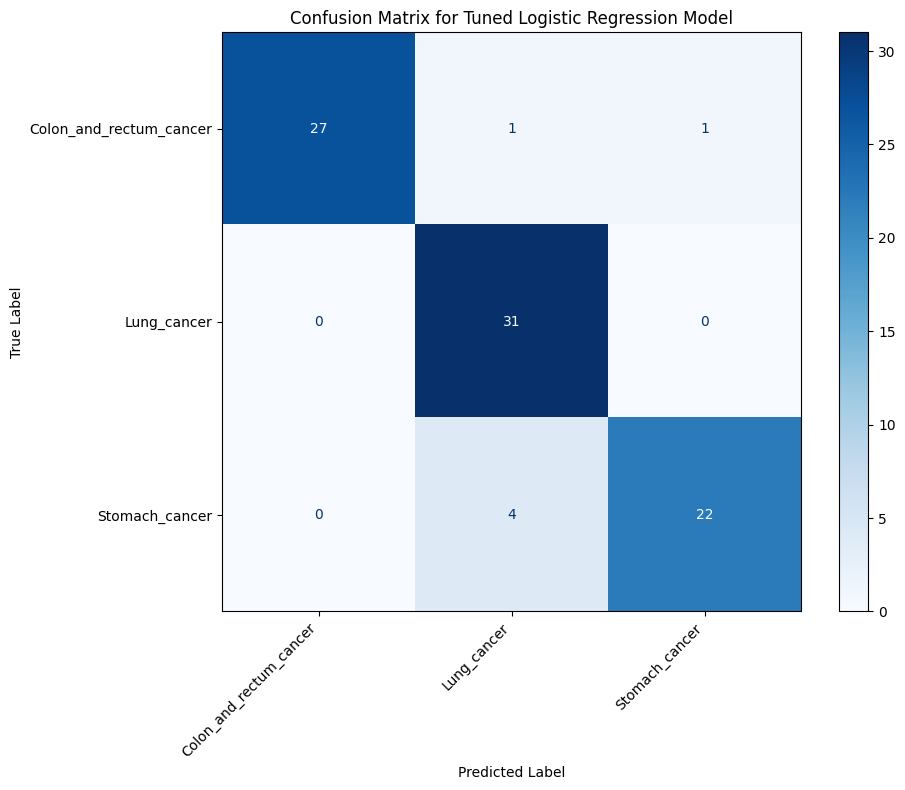

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


best_params_lr = grid_search_lr.best_params_

print(f"Training Logistic Regression with best hyperparameters: {best_params_lr}")


log_reg_tuned_final = LogisticRegression(max_iter=1000, random_state=42, **best_params_lr)


log_reg_tuned_final.fit(X_train_filtered, y_train)

print("Tuned Logistic Regression model successfully trained.")


y_train_pred_lr_tuned = log_reg_tuned_final.predict(X_train_filtered)

train_accuracy_lr_tuned = accuracy_score(y_train, y_train_pred_lr_tuned)
print(f"\nTraining Accuracy (Tuned Logistic Regression): {train_accuracy_lr_tuned:.2f}")

y_test_pred_lr_tuned = log_reg_tuned_final.predict(X_test_filtered)

test_accuracy_lr_tuned = accuracy_score(y_test, y_test_pred_lr_tuned)
print(f"Test Accuracy (Tuned Logistic Regression): {test_accuracy_lr_tuned:.2f}")


print("\nClassification Report for Test Data (Tuned Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr_tuned))


cm_lr_tuned = confusion_matrix(y_test, y_test_pred_lr_tuned, labels=log_reg_tuned_final.classes_)
disp_lr_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_lr_tuned, display_labels=log_reg_tuned_final.classes_)

fig, ax = plt.subplots(figsize=(10, 8))
disp_lr_tuned.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Tuned Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
ax.grid(False) # Corrected placement: applies before showing the plot
plt.show()

Both models have the same overall accuracy, but the individual comparisons differ.

| Metric                       | Initial Logistic Regression Model | Tuned Logistic Regression Model |
| :---------------------------- | :--------------------------------- | :-------------------------------- |
| **Best Hyperparameters**     | N.v.t.                             | `{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}` |
| **Training Accuracy**   | 1.00                               | 1.00                              |
| **Testing Accuracy**        | 0.93                               | 0.93                              |
| **Colon_and_rectum_cancer Precision** | 1.00                               | 1.00                              |
| **Colon_and_rectum_cancer Recall**   | 0.90                               | 0.93                              |
| **Colon_and_rectum_cancer F1-score** | 0.95                               | 0.96                              |
| **Lung_cancer Precision**      | 0.89                               | 0.86                              |
| **Lung_cancer Recall**        | 1.00                               | 1.00                              |
| **Lung_cancer F1-score**      | 0.94                               | 0.93                              |
| **Stomach_cancer Precision**   | 0.92                               | 0.96                              |
| **Stomach_cancer Recall**     | 0.88                               | 0.85                              |
| **Stomach_cancer F1-score**   | 0.90                               | 0.90                              |

| Metric                       | Tuned Logistic Regression Model | Tuned Random Forest Model |
| :---------------------------- | :-------------------------------- | :-------------------------- |
| **Best Hyperparameters**     | `{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}` | `{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.8, 'max_depth': 10}` |
| **Training Accuracy**   | 1.00                               | 1.00                        |
| **Testing Accuracy**        | **0.93**                           | **0.87**                    |
| **Classification Rapports (Test Data):** |||
| **Colon_and_rectum_cancer Precision** | 1.00                               | 0.87                        |
| **Colon_and_rectum_cancer Recall**   | 0.93                               | 0.90                        |
| **Colon_and_rectum_cancer F1-score** | 0.96                               | 0.88                        |
| **Lung_cancer Precision**      | 0.86                               | 0.88                        |
| **Lung_cancer Recall**        | 1.00                               | 0.90                        |
| **Lung_cancer F1-score**      | 0.93                               | 0.89                        |
| **Stomach_cancer Precision**   | 0.96                               | 0.88                        |
| **Stomach_cancer Recall**     | 0.85                               | 0.81                        |
| **Stomach_cancer F1-score**   | 0.90                               | 0.84                        |